In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

top200 = "datasets/Top200.csv"
topgenre = "datasets/Top10000genre.csv"

top200_df = pd.read_csv(top200)
topgenre_df = pd.read_csv(topgenre)

top200_df = top200_df.drop(columns=['Index','Song ID','Chord','Valence','Duration (ms)','Tempo','Liveness','Acousticness','Speechiness'])
topgenre_df = topgenre_df.drop(columns=['track_id','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence'])
# genre = []
# genre = (pd.unique(topgenre_df['genre']))
# genre200 = []
# genre200 = (pd.unique(top200_df['Genre']))
# genre200

# top200_df.columns
# top200_df.Genre.value_counts()
# pop_genre = top200_df[top200_df['Genre'].str.contains('pop')]
# pop_genre = top200_df[(top200_df['Genre'].str.contains('pop')) & (top200_df['Genre'].str.len()<2)]
top200_df.Genre= top200_df.Genre.str.replace('[','')
top200_df.Genre= top200_df.Genre.str.replace(']','')
top200_df.Genre = top200_df.Genre.str.split(',')
top200_df = top200_df.explode('Genre')
top200_df.Genre = top200_df.Genre.str.replace("\'", "")

# top200_df.head()


# topgenre_df.info()


/var/folders/tn/m51dm4nd5wv2rw2867yd_l_h0000gn/T/ipykernel_84615/1424953187.py:24: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top200_df.Genre= top200_df.Genre.str.replace('[','')
/var/folders/tn/m51dm4nd5wv2rw2867yd_l_h0000gn/T/ipykernel_84615/1424953187.py:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top200_df.Genre= top200_df.Genre.str.replace(']','')


In [2]:
# #sorting music for specific genre
pop_genre = top200_df[top200_df.Genre=='pop']
hiphop_genre = top200_df[top200_df.Genre=='hip hop']
rap_genre = top200_df[top200_df.Genre=='rap']
pop_genre.shape[0]


100

In [3]:
#sorting music for word included (contains overlap)
pop_any = top200_df[top200_df.Genre.str.contains('pop')]
hiphop_any = top200_df[top200_df.Genre.str.contains('hip hop')]
rap_any = top200_df[top200_df.Genre.str.contains('rap')]
rb_any = top200_df[top200_df.Genre.str.contains('r&b')]
country_any = top200_df[top200_df.Genre.str.contains('country')]
rock_any = top200_df[top200_df.Genre.str.contains('rock')]
alt_any = top200_df[top200_df.Genre.str.contains('alternative')]
dance_any = top200_df[top200_df.Genre.str.contains('dance')]
edm_any = top200_df[top200_df.Genre.str.contains('edm')]
# house_any = top200_df[top200_df.Genre.str.contains('house')]
# come back and group rest of unique categories
jazz_any = top200_df[top200_df.Genre.str.contains('jazz')]
indie_any = top200_df[top200_df.Genre.str.contains('indie')]
itl_any = top200_df[top200_df.Genre.str.contains('italiano')]
span_any = top200_df[top200_df.Genre.str.contains('reggaeton')]
trap_any = top200_df[top200_df.Genre.str.contains('trap')]
latin_any = top200_df[top200_df.Genre.str.contains('latin')]


In [4]:
#setting other category 
genre_list = ['pop','hip hop','rap','r&b','country','rock','alternative','dance','edm','jazz','indie','italiano','reggaeton','trap','latin']
pattern = '|'.join(genre_list)
result = top200_df.loc[~(top200_df['Genre'].str.contains(pattern, case=False))]
other = result
other_genre = (pd.unique(result['Genre']))

In [5]:
# genre = (pd.unique(top200_df['Genre']))
# genre
# genre_df = pd.DataFrame({
#     "Pop": pop_any,
#     "Hip Hop": hiphop_any,
#     "Rap": rap_any,
#     "R&B": rb_any,
#     "Country": country_any,
#     "Rock": rock_any,
#     "Alternative": alt_any,
#     "Dance": dance_any,
#     "EDM": edm_any,
#     "Jazz": jazz_any,
#     "Indie": indie_any,
#     "Italiano": itl_any,
#     "Reggaeton": span_any,
#     "Trap": trap_any,
#     "Latin": latin_any,
#     "Other": other
# })

In [6]:

# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib inline 
%matplotlib notebook
import pandas as pd
import numpy as np

num_pop = pop_any.Genre.count()
num_rap = rap_any.Genre.count()
num_hiphop = hiphop_any.Genre.count()
num_rb = rb_any.Genre.count()
num_country = country_any.Genre.count()
num_rock = rock_any.Genre.count()
num_alt = alt_any.Genre.count()
num_dance = dance_any.Genre.count()
num_edm = edm_any.Genre.count()
# house_any = top200_df[top200_df.Genre.str.contains('house')]
# come back and group rest of unique categories
num_jazz = jazz_any.Genre.count()
num_indie = indie_any.Genre.count()
num_itl = itl_any.Genre.count()
num_span = span_any.Genre.count()
num_trap = trap_any.Genre.count()
num_latin = latin_any.Genre.count()
num_other = other.Genre.count()


genre_count = pd.DataFrame({'Genre'})
genre_count


,0
0,Genre


<IPython.core.display.Javascript object>


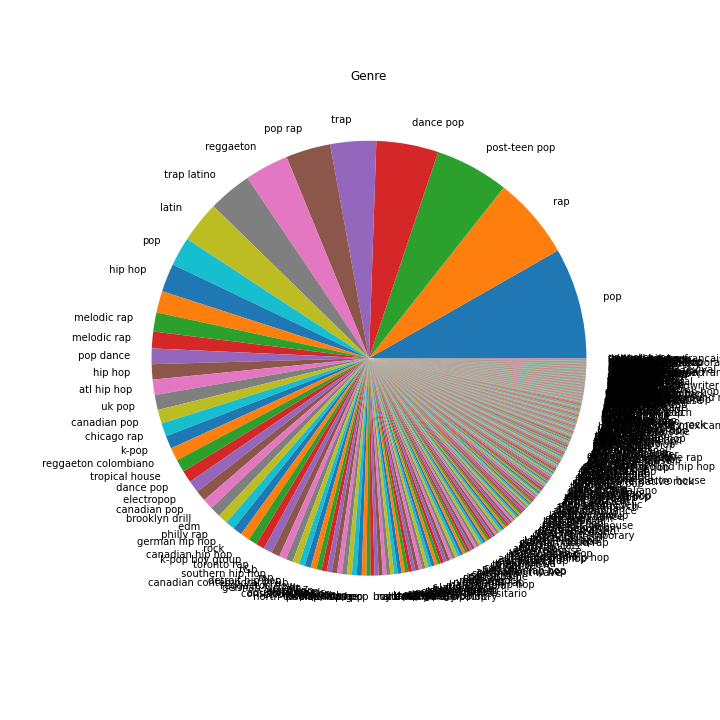

Text(0.5, 1.0, 'Genre')

In [22]:
import pandas as pd
import matplotlib.pyplot as plt 

list(top200_df['Genre'].value_counts().values)

# Pie chart specific to genre comprehensive to all data available
labels = ['pop','hip hop','rap','r&b','country','rock','alternative','dance','edm','jazz','indie','italiano','reggaeton','trap','latin']

# The values of each section of the pie chart
# sizes = [[num_pop], [num_rap], [num_hiphop], [num_rb]]

# The colors of each section of the pie chart
# colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
# explode = (0.1, 0, 0, 0)
figure1, axl = plt.subplots(figsize=(10, 10))
# plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140)
plt.pie(list(top200_df["Genre"].value_counts().values),labels=list(top200_df["Genre"].value_counts().index))
plt.title("Genre")

In [8]:
# Color coded scatter plot with stream comparison + genre


In [9]:
# These artist are multi genre artist (not all data/ artist specific)  

In [10]:
# How many weeks a song is on a chart vs. number of streams (scatter plot) data of top 50 songs that ranked #1 (write axis to hover for song information)
# From date of song release to how long it took to hit the chart
